![Dataset](images/dataset.png)

In [105]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("text_dataset_cleaned.csv")

In [4]:
df = df.sample(frac=1)

In [5]:
df

,cleaned_text
24094,tsla make run towards ath week next week say tell
20173,tonight night trying destroy weak hand fortuna...
34123,holy cow cnbc call tsla potentially 2500 next ...
39690,many interested stock find crazy pattern amazo...
59545,get rival late run goat amp
...,...
10138,love bullish elon tsla httpstco6trinyo1da
16056,mediapeople mistakenly report drone tsla cyber...
38433,guy think spx go 3800 like tsla amznsmh
3006,remember software price increase tesla expand ...


In [6]:
df.size

64860

In [7]:
df.shape

(64860, 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64860 entries, 24094 to 44053
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cleaned_text  64823 non-null  object
dtypes: object(1)
memory usage: 1013.4+ KB


In [9]:
df.describe()

,cleaned_text
count,64823
unique,64342
top,welcome
freq,22


In [10]:
df.duplicated().sum()

517

In [11]:
# dropping duplicates from the dataset
df = df.drop_duplicates()

In [12]:
df.isnull().sum()

cleaned_text    1
dtype: int64

In [13]:
# dropping null values
df = df.dropna()

### Tokenization

In [14]:
import nltk

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [16]:
# fetching number of characters in each text message
df["num_of_chars"] = df["cleaned_text"].apply(len)

In [17]:
# number of words
df["num_of_words"] = df["cleaned_text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [18]:
# number of sentences
df["num_of_sents"] = df["cleaned_text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [19]:
df[["num_of_chars", "num_of_words", "num_of_sents"]].describe()

,num_of_chars,num_of_words,num_of_sents
count,64342.000000,64342.000000,64342.0
mean,96.206568,14.766762,1.0
std,58.606503,9.373735,0.0
min,1.000000,1.000000,1.0
25%,47.000000,7.000000,1.0
50%,83.000000,12.000000,1.0
75%,144.000000,22.000000,1.0
max,259.000000,65.000000,1.0


In [20]:
# dropping the non required columns
df.drop(columns=["num_of_chars", "num_of_words", "num_of_sents"], inplace=True)

In [21]:
# Applying tokenization to 'cleaned_text' column
df["tokenized_text"] = df["cleaned_text"].apply(word_tokenize)

In [22]:
df.head()

,cleaned_text,tokenized_text
24094,tsla make run towards ath week next week say tell,"[tsla, make, run, towards, ath, week, next, we..."
20173,tonight night trying destroy weak hand fortuna...,"[tonight, night, trying, destroy, weak, hand, ..."
34123,holy cow cnbc call tsla potentially 2500 next ...,"[holy, cow, cnbc, call, tsla, potentially, 250..."
39690,many interested stock find crazy pattern amazo...,"[many, interested, stock, find, crazy, pattern..."
59545,get rival late run goat amp,"[get, rival, late, run, goat, amp]"


### POS Tagging

In [23]:
from textblob import TextBlob

In [24]:
def pos_tagging(text):
    blob = TextBlob(text)
    tagged_text = [(word, tag) for word, tag in blob.tags]
    return tagged_text


# Apply POS tagging to the 'cleaned_text' column
df["pos_tagged_text"] = df["cleaned_text"].apply(pos_tagging)

In [25]:
df.tail()

,cleaned_text,tokenized_text,pos_tagged_text
10138,love bullish elon tsla httpstco6trinyo1da,"[love, bullish, elon, tsla, httpstco6trinyo1da]","[(love, VB), (bullish, JJ), (elon, NN), (tsla,..."
16056,mediapeople mistakenly report drone tsla cyber...,"[mediapeople, mistakenly, report, drone, tsla,...","[(mediapeople, NN), (mistakenly, RB), (report,..."
38433,guy think spx go 3800 like tsla amznsmh,"[guy, think, spx, go, 3800, like, tsla, amznsmh]","[(guy, NN), (think, VB), (spx, NN), (go, VBP),..."
3006,remember software price increase tesla expand ...,"[remember, software, price, increase, tesla, e...","[(remember, VB), (software, NN), (price, NN), ..."
44053,watchlist spy call 42611 put 4241qqq call 3321...,"[watchlist, spy, call, 42611, put, 4241qqq, ca...","[(watchlist, NN), (spy, NN), (call, NN), (4261..."


### N-Grams

In [26]:
from nltk.util import ngrams

In [27]:
# Function to extract N-grams from a list of tokens
def extract_ngrams(tokens, n):
    if len(tokens) >= n:
        return list(ngrams(tokens, n))
    else:
        return []

In [28]:
# Applying bi-gram extraction to the 'tokenized_text' column
n_gram_order = 2
df["bigrams"] = df["tokenized_text"].apply(lambda x: extract_ngrams(x, n_gram_order))

In [29]:
# Applying tri-gram extraction to the 'tokenized_text' column
n_gram_order = 3
df["trigrams"] = df["tokenized_text"].apply(lambda x: extract_ngrams(x, n_gram_order))

In [30]:
df.sample(3)

,cleaned_text,tokenized_text,pos_tagged_text,bigrams,trigrams
14831,case something fun happen tonight tsla httpstc...,"[case, something, fun, happen, tonight, tsla, ...","[(case, NN), (something, NN), (fun, NN), (happ...","[(case, something), (something, fun), (fun, ha...","[(case, something, fun), (something, fun, happ..."
6509,tsla observations1 larry ellison leave year ow...,"[tsla, observations1, larry, ellison, leave, y...","[(tsla, NN), (observations1, NN), (larry, NN),...","[(tsla, observations1), (observations1, larry)...","[(tsla, observations1, larry), (observations1,..."
16292,tsla 14 1060 premkt front giga texas cyber rod...,"[tsla, 14, 1060, premkt, front, giga, texas, c...","[(tsla, RB), (14, CD), (1060, CD), (premkt, NN...","[(tsla, 14), (14, 1060), (1060, premkt), (prem...","[(tsla, 14, 1060), (14, 1060, premkt), (1060, ..."


![WordCloud Visualization](images/visualization.png)

In [31]:
import matplotlib.pyplot as plt

In [32]:
from wordcloud import WordCloud

#### Unigram Cloud

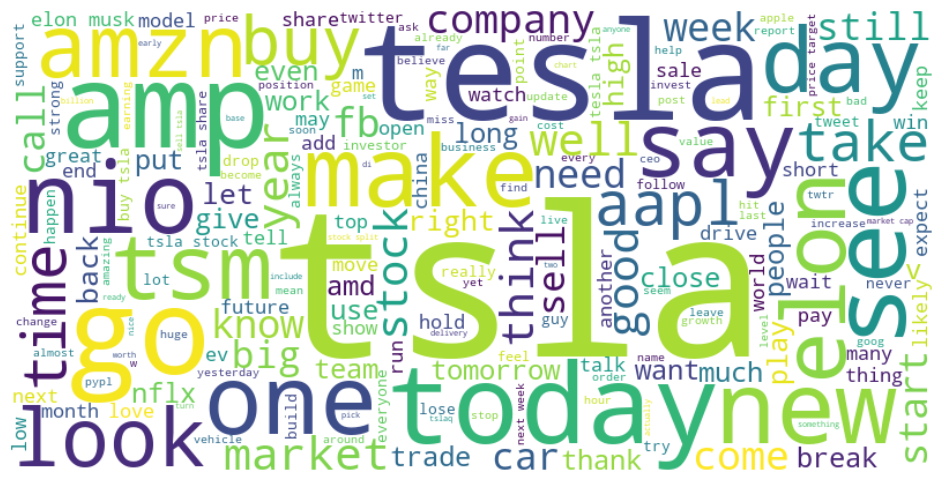

In [33]:
unigram_text = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
    unigram_text
)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Bi-gram Cloud

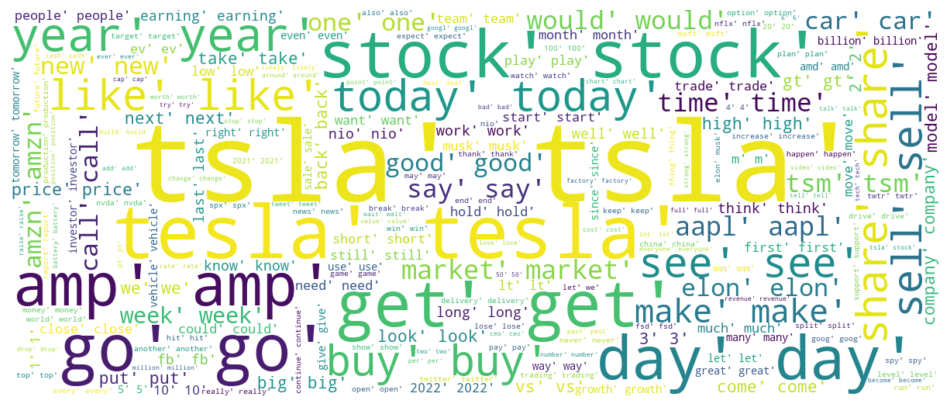

In [34]:
bigram_text = " ".join([" ".join(map(str, bigrams)) for bigrams in df["bigrams"]])
wordcloud = WordCloud(width=1200, height=500, background_color="white").generate(
    bigram_text
)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Tri-gram Cloud

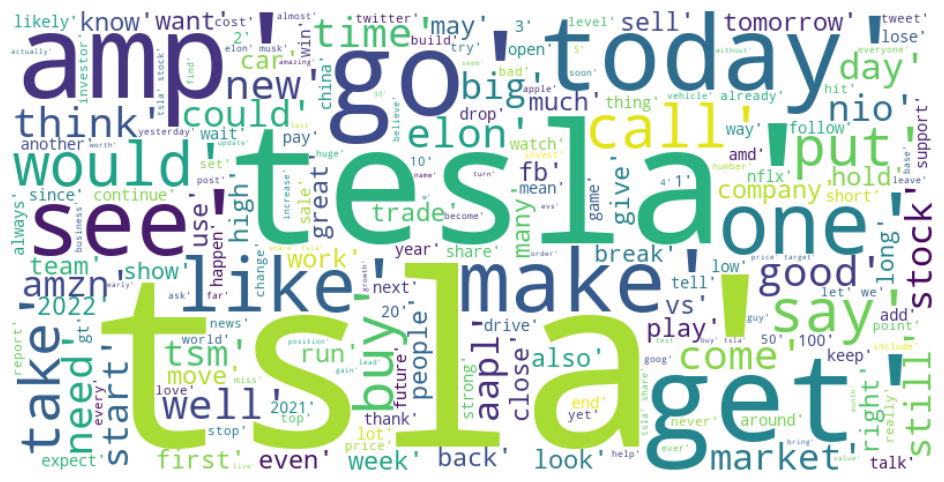

In [35]:
trigram_text = " ".join([" ".join(map(str, trigrams)) for trigrams in df["trigrams"]])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
    trigram_text
)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [36]:
# dropping the non required columns
df.drop(columns=["pos_tagged_text", "bigrams", "trigrams"], inplace=True)

![Sentiment Generation](images/sentiment.png)

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [38]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [39]:
# Initializing the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [40]:
# Function to calculate sentiment scores
def get_sentiment_scores(text):
    text = " ".join(text)
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Applying get_sentiment_scores to the 'tokenized_text' column
df["sentiment_scores"] = df["tokenized_text"].apply(get_sentiment_scores)

In [41]:
df["compound_scores"] = df["sentiment_scores"].apply(lambda x: x['compound'])

In [42]:
df

,cleaned_text,tokenized_text,sentiment_scores,compound_scores
24094,tsla make run towards ath week next week say tell,"[tsla, make, run, towards, ath, week, next, we...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
20173,tonight night trying destroy weak hand fortuna...,"[tonight, night, trying, destroy, weak, hand, ...","{'neg': 0.284, 'neu': 0.222, 'pos': 0.493, 'co...",0.5719
34123,holy cow cnbc call tsla potentially 2500 next ...,"[holy, cow, cnbc, call, tsla, potentially, 250...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
39690,many interested stock find crazy pattern amazo...,"[many, interested, stock, find, crazy, pattern...","{'neg': 0.087, 'neu': 0.58, 'pos': 0.333, 'com...",0.7003
59545,get rival late run goat amp,"[get, rival, late, run, goat, amp]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
...,...,...,...,...
10138,love bullish elon tsla httpstco6trinyo1da,"[love, bullish, elon, tsla, httpstco6trinyo1da]","{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...",0.6369
16056,mediapeople mistakenly report drone tsla cyber...,"[mediapeople, mistakenly, report, drone, tsla,...","{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.2960
38433,guy think spx go 3800 like tsla amznsmh,"[guy, think, spx, go, 3800, like, tsla, amznsmh]","{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'comp...",0.3612
3006,remember software price increase tesla expand ...,"[remember, software, price, increase, tesla, e...","{'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'comp...",0.7783


In [43]:
# Function to get sentiment label
def get_sentiment_label(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.015:
        return "Negative"
    else:
        return "Neutral"

In [44]:
import unicodedata

In [45]:
# Function to calculate sentiment scores
def get_sentiment_scores(text):
    sentence_i = unicodedata.normalize("NFKD", text)
    sentiment = analyzer.polarity_scores(sentence_i)
    sentiment_label = get_sentiment_label(sentiment["compound"])
    return sentiment["neg"], sentiment["neu"], sentiment["pos"], sentiment_label


# Applying get_sentiment_scores to the 'Tweets' column
df["Negative"], df["Neutral"], df["Positive"], df["Sentiment"] = zip(
    *df["cleaned_text"].apply(get_sentiment_scores)
)

In [46]:
df.sample(3)

,cleaned_text,tokenized_text,sentiment_scores,compound_scores,Negative,Neutral,Positive,Sentiment
61671,nio warn energy crisis slow european expansion,"[nio, warn, energy, crisis, slow, european, ex...","{'neg': 0.474, 'neu': 0.345, 'pos': 0.181, 'co...",-0.5267,0.474,0.345,0.181,Negative
43081,think put goog let jesus take wheel,"[think, put, goog, let, jesus, take, wheel]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,1.000,0.000,Neutral
61610,add enph cmg csgp teva pegpower earning gap wa...,"[add, enph, cmg, csgp, teva, pegpower, earning...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,1.000,0.000,Neutral


In [47]:
from collections import Counter

##### Positive Tokens

In [48]:
# Filtering the DataFrame for Positive sentiment
positive_texts = df[df["Sentiment"] == "Positive"]["cleaned_text"]

In [49]:
# Tokenizing the positive texts
positive_words = " ".join(positive_texts).split()

In [50]:
# Counting the occurrences of each positive word
positive_word_counts = Counter(positive_words)

In [51]:
# Converting the counts of most common 20 positive tokens to a DataFrame
positive_word_counts_df = pd.DataFrame(
    positive_word_counts.most_common(20), columns=["Word", "Count"]
)

In [52]:
import seaborn as sns

C:\Users\anike\AppData\Local\Temp\ipykernel_23840\2543650577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Word", data=positive_word_counts_df, palette="viridis")


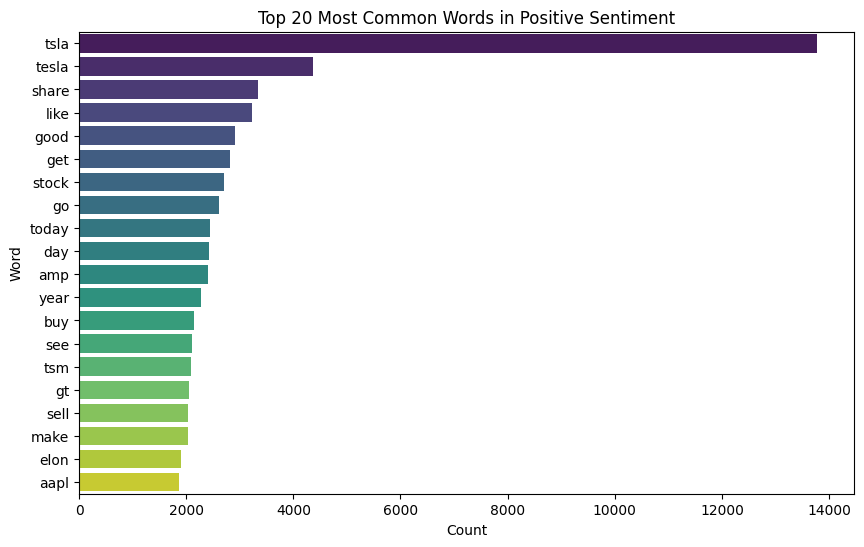

In [53]:
# Plotting the most common words in positive sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Word", data=positive_word_counts_df, palette="viridis")
plt.title("Top 20 Most Common Words in Positive Sentiment")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

##### Negative Tokens

In [54]:
# Filtering the DataFrame for negative sentiment
negative_texts = df[df["Sentiment"] == "Negative"]["cleaned_text"]

In [55]:
# Tokenizing the negative texts
negative_words = " ".join(negative_texts).split()

In [56]:
# Counting the occurrences of each negative word
negative_word_counts = Counter(negative_words)

In [57]:
# Converting the counts of most common 20 negative tokens to a DataFrame
negative_word_counts_df = pd.DataFrame(
    negative_word_counts.most_common(20), columns=["Word", "Count"]
)

C:\Users\anike\AppData\Local\Temp\ipykernel_23840\558938004.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Word", data=negative_word_counts_df, palette="Reds_r")


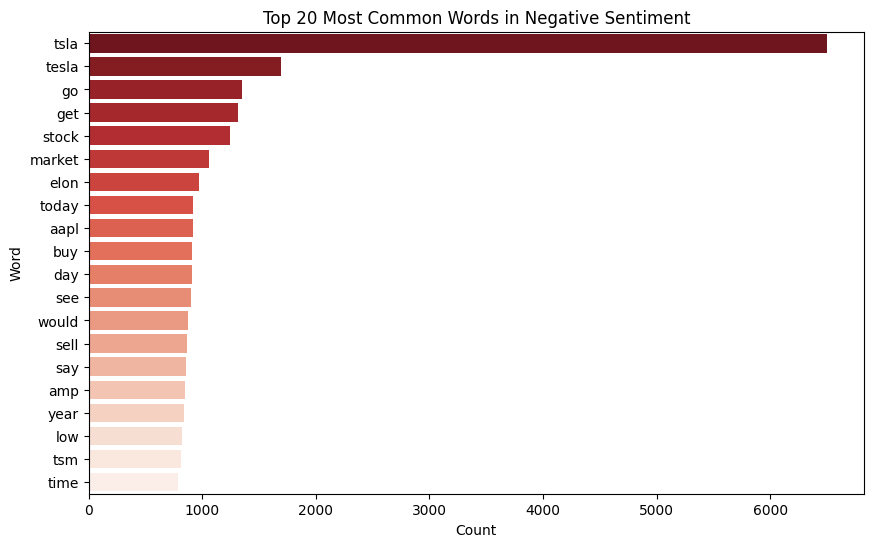

In [58]:
# Plotting the most common words in negative sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Word", data=negative_word_counts_df, palette="Reds_r")
plt.title("Top 20 Most Common Words in Negative Sentiment")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

##### Neutral Tokens

In [59]:
# Filtering the DataFrame for Neutral sentiment
neutral_texts = df[df["Sentiment"] == "Neutral"]["cleaned_text"]

In [60]:
# Tokenizing the neutral texts
neutral_words = " ".join(neutral_texts).split()

In [61]:
# Counting the occurrences of each neutral word
neutral_word_counts = Counter(neutral_words)

In [62]:
# Converting the counts of most common 20 negative tokens to a DataFrame
neutral_word_counts_df = pd.DataFrame(
    neutral_word_counts.most_common(20), columns=["Word", "Count"]
)

C:\Users\anike\AppData\Local\Temp\ipykernel_23840\71238241.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Word", data=neutral_word_counts_df, palette="Greens_r")


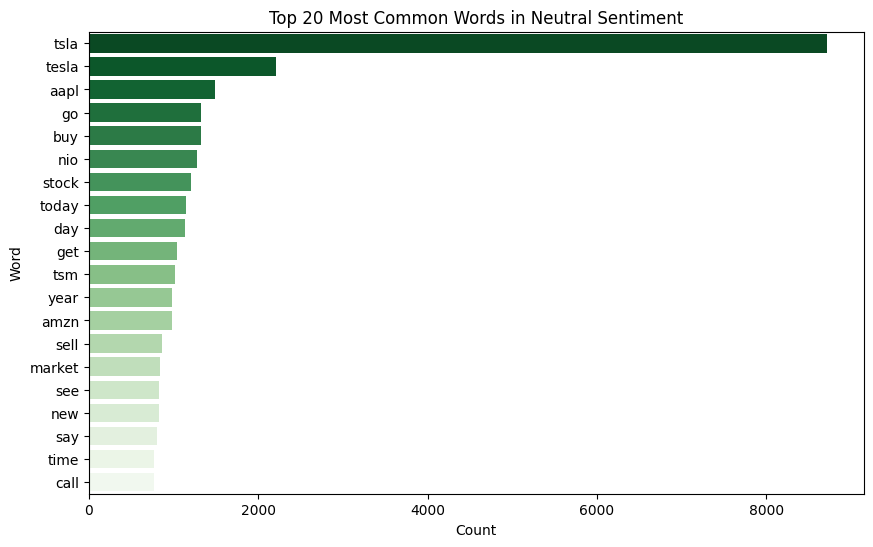

In [72]:
# Plot the most common words in neutral sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Word", data=neutral_word_counts_df, palette="Greens_r")
plt.title("Top 20 Most Common Words in Neutral Sentiment")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

In [64]:
df = df[['cleaned_text', 'Sentiment']]

In [65]:
df.rename(columns={"cleaned_text": "text"}, inplace=True)

C:\Users\anike\AppData\Local\Temp\ipykernel_23840\2656261607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"cleaned_text": "text"}, inplace=True)


![Text Classification](images/classification.png)

##### Label Encoding

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
label_encoder = LabelEncoder()

In [68]:
df["label"] = label_encoder.fit_transform(df["Sentiment"])

C:\Users\anike\AppData\Local\Temp\ipykernel_23840\237025270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = label_encoder.fit_transform(df["Sentiment"])


In [69]:
df = df[["text", "label"]]

In [71]:
df

,text,label
24094,tsla make run towards ath week next week say tell,1
20173,tonight night trying destroy weak hand fortuna...,2
34123,holy cow cnbc call tsla potentially 2500 next ...,1
39690,many interested stock find crazy pattern amazo...,2
59545,get rival late run goat amp,1
...,...,...
10138,love bullish elon tsla httpstco6trinyo1da,2
16056,mediapeople mistakenly report drone tsla cyber...,0
38433,guy think spx go 3800 like tsla amznsmh,2
3006,remember software price increase tesla expand ...,2


#### TF-IDF Vectorization

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [86]:
tfidf = TfidfVectorizer(max_features=1000)

In [87]:
X = tfidf.fit_transform(df["text"]).toarray()

In [88]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [89]:
y = df["label"].values

In [90]:
X.shape, y.shape

((64342, 1000), (64342,))

##### Train Test Split

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [93]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(51473, 1000)
(12869, 1000)
(51473,)
(12869,)


![Machine Learning Classification Model](images/training.png)

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB, BernoulliNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier

In [95]:
lrc = LogisticRegression(solver="liblinear", penalty="l1")
mnb = MultinomialNB()
# svc = SVC(kernel="sigmoid", gamma=1.0)
# gnb = GaussianNB()
# bnb = BernoulliNB()
# knc = KNeighborsClassifier()
# dtc = DecisionTreeClassifier(max_depth=5)
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [96]:
classifiers = {
    "LR": lrc,
    "MNB": mnb,
    # "GNB": gnb,
    # "BNB": bnb,
    # "SVC": svc,
    # "KN": knc,
    # "NB": mnb,
    # "DT": dtc,
    # "RF": rfc,
    # "AdaBoost": abc,
    # "BgC": bc,
    # "ETC": etc,
    # "GBDT": gbdt,
}

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

In [100]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted") # for multi-class classification

    return accuracy, precision

In [101]:
accuracy_scores = []
precision_scores = []

for name, clf in classifiers.items():
    current_accuracy, current_precision = train_classifier(
        clf, x_train, y_train, x_test, y_test
    )

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [102]:
eval_df = pd.DataFrame(
    {
        "Algorithm": classifiers.keys(),
        "Accuracy": accuracy_scores,
        "Precision": precision_scores,
    }
).sort_values("Accuracy", ascending=False)

In [103]:
eval_df

,Algorithm,Accuracy,Precision
0,LR,0.827415,0.835731
1,MNB,0.687155,0.717136


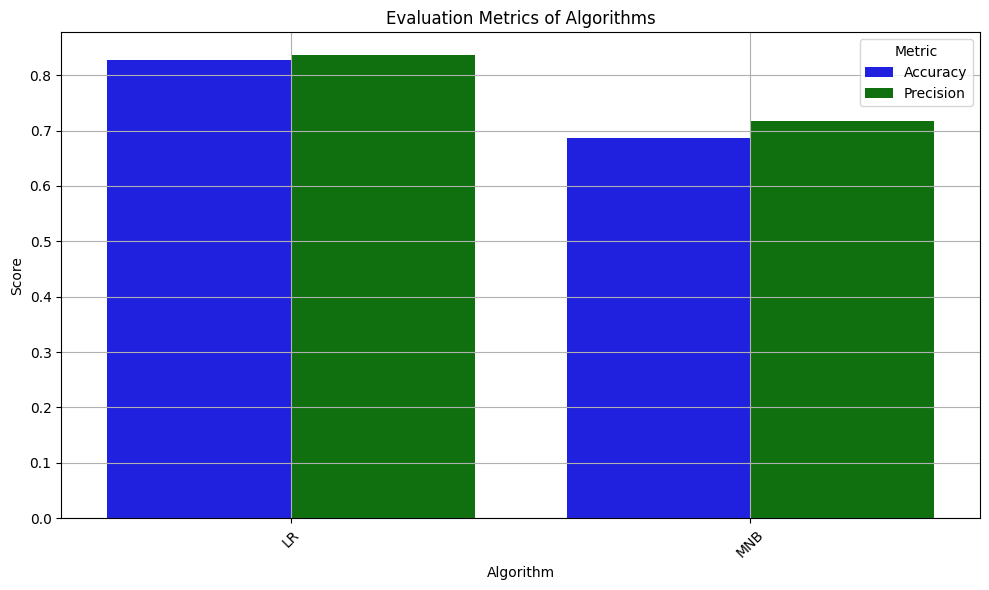

In [108]:
# Melting the DataFrame to have 'Metric' as a variable
eval_df_melted = pd.melt(
    eval_df, id_vars="Algorithm", var_name="Metric", value_name="Score"
)

# Plotting the evaluation results
plt.figure(figsize=(10, 6))

# Plot Accuracy and Precision
sns.barplot(
    x="Algorithm",
    y="Score",
    hue="Metric",
    data=eval_df_melted,
    palette=["blue", "green"],
)

plt.title("Evaluation Metrics of Algorithms")
plt.ylabel("Score")
plt.xticks(rotation=45)  
plt.legend(title="Metric")
plt.grid(True)
plt.tight_layout()
plt.show()

### Logistic Regression

In [109]:
lrc = lrc.fit(x_train, y_train)

In [110]:
lrc_pred = lrc.predict(x_test)

In [112]:
print(classification_report(y_test, lrc_pred))

              precision    recall  f1-score   support

           0       0.82      0.57      0.67      2554
           1       0.75      0.94      0.83      4135
           2       0.90      0.86      0.88      6180

    accuracy                           0.83     12869
   macro avg       0.82      0.79      0.79     12869
weighted avg       0.84      0.83      0.82     12869



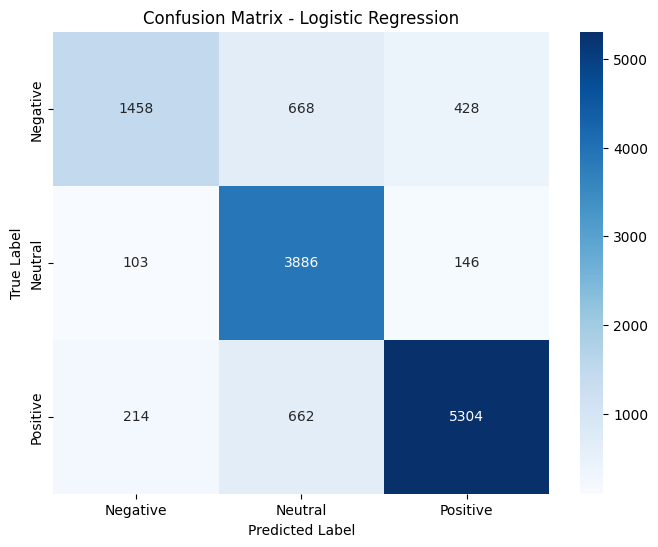

In [113]:
# Calculating confusion matrix
cm = confusion_matrix(y_test, lrc_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Negative", "Neutral", "Positive"],
    yticklabels=["Negative", "Neutral", "Positive"],
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [114]:
import pickle

In [115]:
pickle.dump(tfidf, open("tfidf_vectorizer.pkl", "wb"))
pickle.dump(lrc, open("logistic_regression_model.pkl", "wb"))